In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### READ THE DATA

In [2]:
df=pd.read_csv('top50.csv',encoding="ISO-8859-1")

In [3]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [4]:
data = df.iloc[:,1:]

### Searching Missing Data

In [5]:
col_names= data.columns.tolist()
for column in col_names:
  print("Valores Nulos en <{0}>: <{1}>".format(column,data[column].isnull().sum()))

Valores Nulos en <Track.Name>: <0>
Valores Nulos en <Artist.Name>: <0>
Valores Nulos en <Genre>: <0>
Valores Nulos en <Beats.Per.Minute>: <0>
Valores Nulos en <Energy>: <0>
Valores Nulos en <Danceability>: <0>
Valores Nulos en <Loudness..dB..>: <0>
Valores Nulos en <Liveness>: <0>
Valores Nulos en <Valence.>: <0>
Valores Nulos en <Length.>: <0>
Valores Nulos en <Acousticness..>: <0>
Valores Nulos en <Speechiness.>: <0>
Valores Nulos en <Popularity>: <0>


#### Most popular Artist

<function matplotlib.pyplot.show(*args, **kw)>

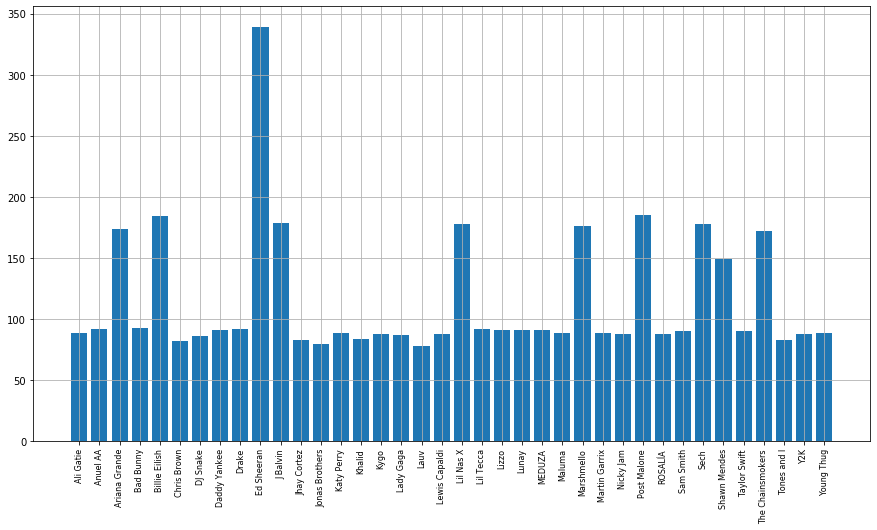

In [6]:
artist = [artist for artist, df in data.groupby(['Artist.Name'])]
plt.figure(figsize=(15,8))
plt.bar(artist, data.groupby(['Artist.Name']).sum()['Popularity'])
plt.xticks(artist, rotation = 'vertical', size= 8 )
plt.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

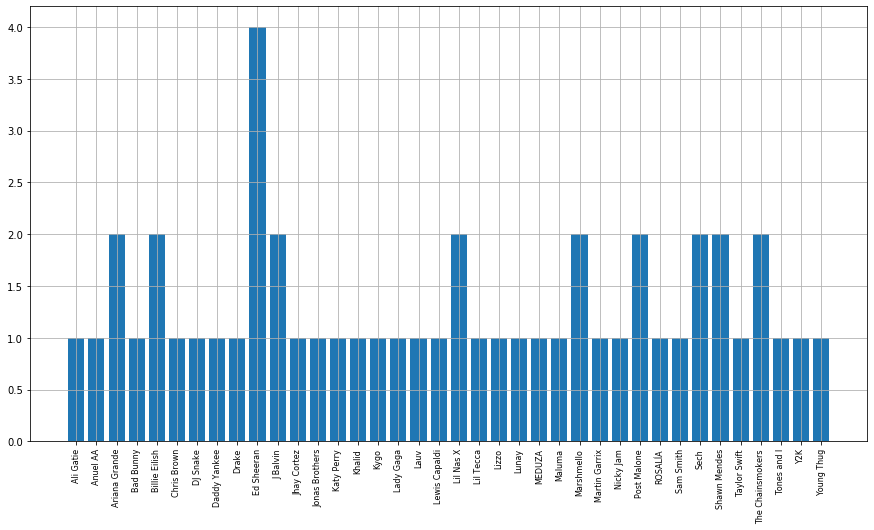

In [7]:
plt.figure(figsize=(15,8))
plt.bar(artist, data.groupby(['Artist.Name']).count()['Popularity'])
plt.xticks(artist, rotation = 'vertical', size= 8 )
plt.grid()
plt.show

#### Most Popular Genre

<function matplotlib.pyplot.show(*args, **kw)>

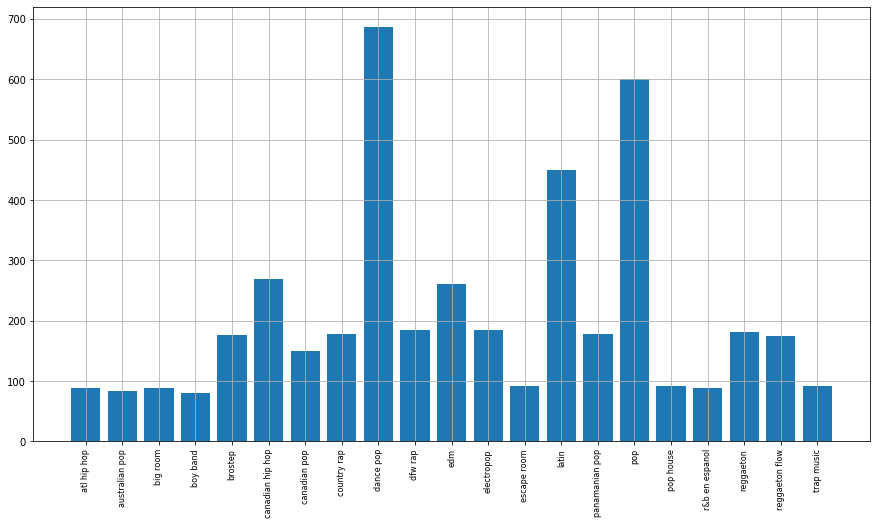

In [8]:
genre = [genre for genre, df in data.groupby(['Genre'])]
plt.figure(figsize=(15,8))
plt.bar(genre, data.groupby(['Genre']).sum()['Popularity'])
plt.xticks(genre, rotation = 'vertical', size= 8 )
plt.grid()
plt.show

#### Popularity By Beats per Minute

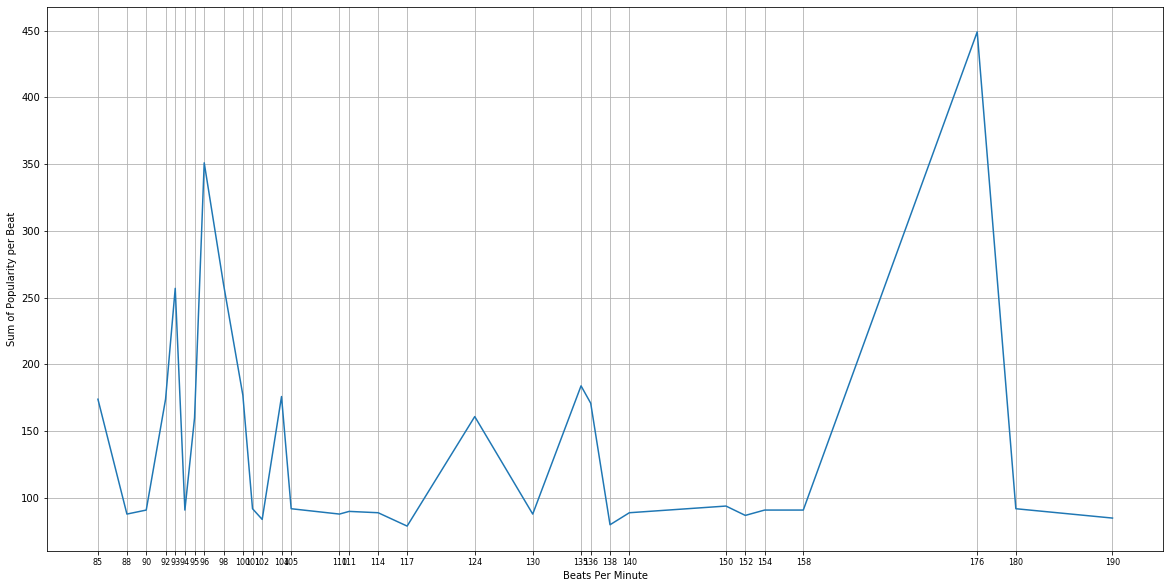

In [9]:
beats=[beat for beat, df in data.groupby(['Beats.Per.Minute'])]
plt.figure(figsize=(20,10))
plt.plot(beats, data.groupby(['Beats.Per.Minute']).sum()['Popularity'])
plt.xticks(beats, size= 8)
plt.xlabel('Beats Per Minute')
plt.ylabel('Sum of Popularity per Beat')
plt.grid()
plt.show()

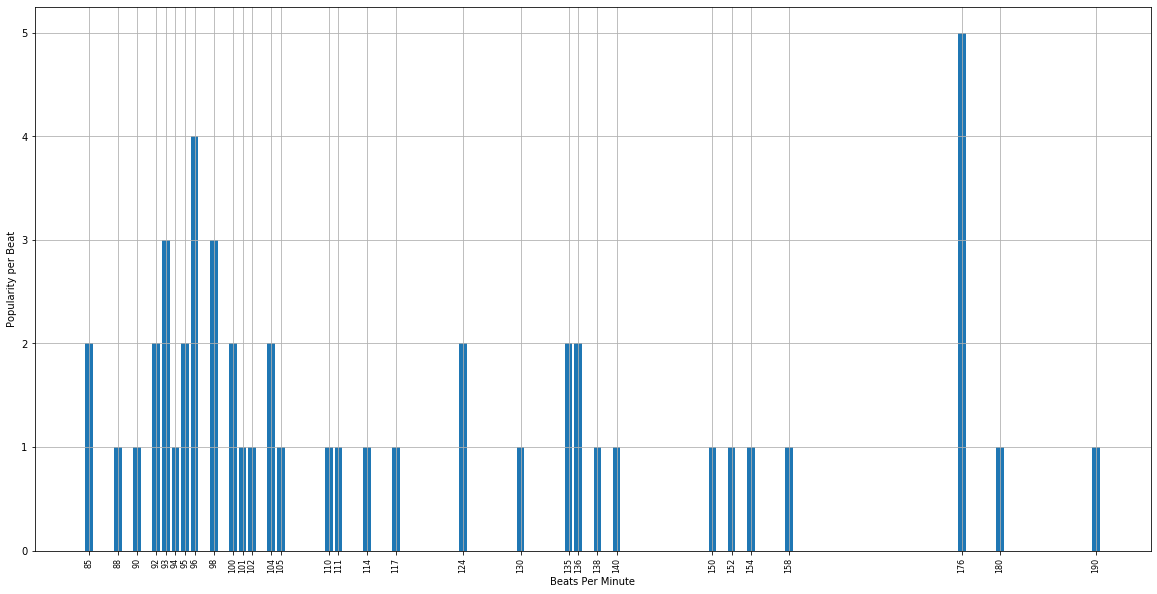

In [10]:
plt.figure(figsize=(20,10))
plt.bar(beats, data.groupby(['Beats.Per.Minute']).count()['Popularity'])
plt.xticks(beats,rotation = 'vertical', size= 8)
plt.xlabel('Beats Per Minute')
plt.ylabel('Popularity per Beat')
plt.grid()
plt.show()

#### Relation between Numerical Data and Popularity

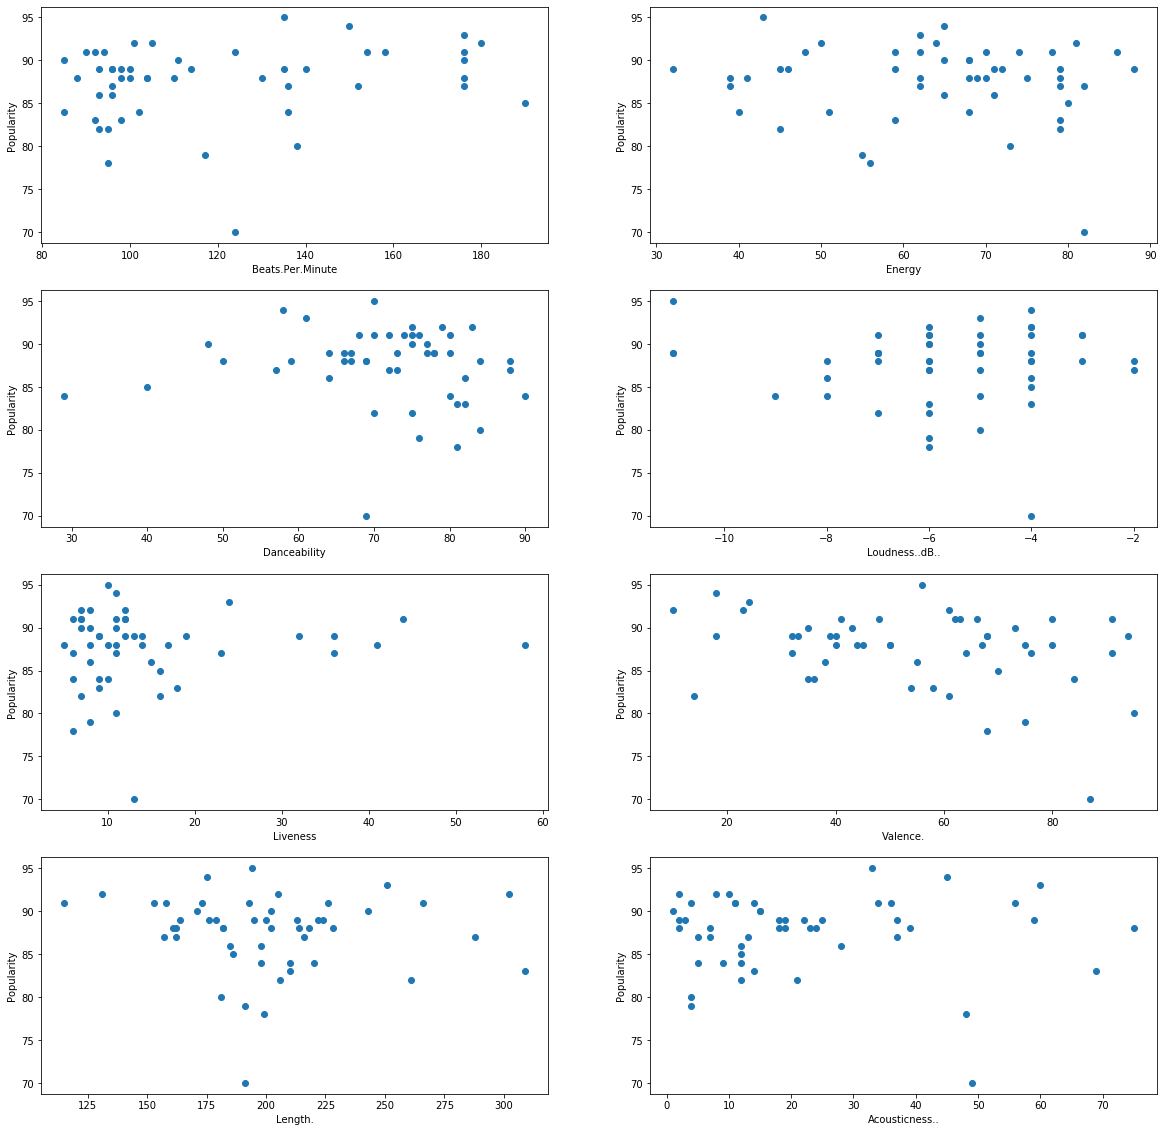

In [11]:
plt.figure(figsize=(20,20))
for i in range(3,len(col_names)-2):
    plt.subplot(4,2,i-2)
    plt.scatter(data[col_names[i]],data['Popularity'])
    plt.xlabel(col_names[i])
    plt.ylabel('Popularity')
plt.show()

#### Correlation

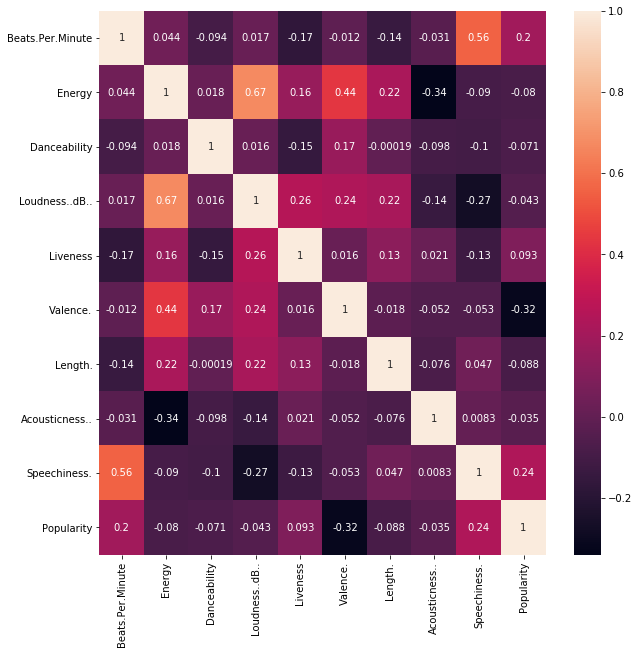

In [12]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot= True)
plt.show()

In [44]:
data['Popularity'].describe()

count    50.000000
mean     87.500000
std       4.491489
min      70.000000
25%      86.000000
50%      88.000000
75%      90.750000
max      95.000000
Name: Popularity, dtype: float64

#### Making a Gruouping Class by Popularity

In [46]:
def classing(a):
    list=np.zeros(len(a))
    for i in range(len(a)):
        list[i]= int((a[i]-(a.min()))/5)+1
        if list[i]==6:
            list[i]=5
    return list

In [47]:
data['PopularityClass']= classing(data['Popularity'])

In [48]:
data.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,PopularityClass,GenreEncoder
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,2.0,6
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,5.0,19
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,4.0,8
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,4.0,15
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,5.0,9


In [17]:
data['PopularityClass'].value_counts()

4.0    23
5.0    16
3.0     8
2.0     2
1.0     1
Name: PopularityClass, dtype: int64

#### Encoding the Genre Data

In [18]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
data['GenreEncoder'] = labelencoder_X.fit_transform(data['Genre'])

In [19]:
data.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,PopularityClass,GenreEncoder
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,2.0,6
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,5.0,19
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,4.0,8
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,4.0,15
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,5.0,9


In [20]:
data.dtypes

Track.Name           object
Artist.Name          object
Genre                object
Beats.Per.Minute      int64
Energy                int64
Danceability          int64
Loudness..dB..        int64
Liveness              int64
Valence.              int64
Length.               int64
Acousticness..        int64
Speechiness.          int64
Popularity            int64
PopularityClass     float64
GenreEncoder          int32
dtype: object

In [21]:
num_Data = data.select_dtypes(exclude = 'object')

In [22]:
num_Data.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,PopularityClass,GenreEncoder
0,117,55,76,-6,8,75,191,4,3,79,2.0,6
1,105,81,79,-4,8,61,302,8,9,92,5.0,19
2,190,80,40,-4,16,70,186,12,46,85,4.0,8
3,93,65,64,-8,8,55,198,12,19,86,4.0,15
4,150,65,58,-4,11,18,175,45,7,94,5.0,9


In [23]:
X_R = num_Data.drop(columns=['Popularity','PopularityClass'])
X_C = num_Data.drop(columns=['Popularity','PopularityClass'])
Y_R = num_Data['Popularity'].values
Y_C = num_Data['PopularityClass'].values

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_R= sc.fit_transform(X_R)

In [25]:
from sklearn.model_selection import train_test_split

X_R_train,X_R_test,Y_R_train,Y_R_test = train_test_split(X_R,Y_R, test_size= 0.2, random_state= 0)

The R2 SCORE IS
0.16993158614686266


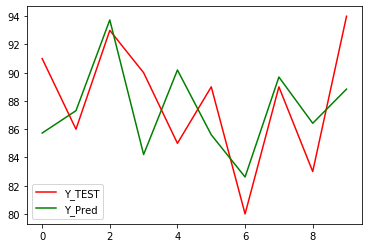

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_R_train, Y_R_train)

"""## Predicting the Test set results"""

Y_R_pred = regressor.predict(X_R_test)

"""## Evaluating the Model Performance"""

from sklearn.metrics import r2_score
print('The R2 SCORE IS')
print(r2_score(Y_R_test, Y_R_pred))

plt.plot(Y_R_test,color='red',label='Y_TEST')
plt.plot(Y_R_pred, color='green', label='Y_Pred')
plt.legend()
plt.show()

The R2 SCORE IS
-0.7481460674157288


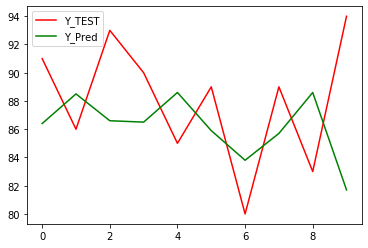

In [28]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_R_train, Y_R_train)

"""## Predicting the Test set results"""

Y_R_pred = regressor.predict(X_R_test)
print('The R2 SCORE IS')

print(r2_score(Y_R_test, Y_R_pred))
plt.plot(Y_R_test,color='red',label='Y_TEST')
plt.plot(Y_R_pred, color='green', label='Y_Pred')
plt.legend()
plt.show()

The R2 SCORE IS
-0.02366526438896832


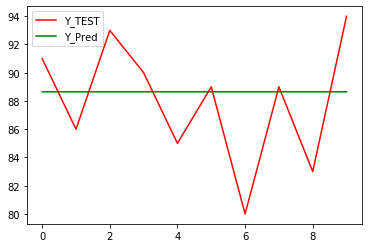

In [29]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_R_train, Y_R_train)

"""## Predicting the Test set results"""

Y_R_pred = (regressor.predict(sc.transform(X_R_test)))
print('The R2 SCORE IS')

print(r2_score(Y_R_test, Y_R_pred))
plt.plot(Y_R_test,color='red',label='Y_TEST')
plt.plot(Y_R_pred, color='green', label='Y_Pred')
plt.legend()
plt.show()

The R2 SCORE IS
-5.690002047911091


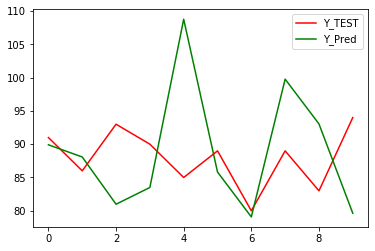

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_R_train)
regressorpoly = LinearRegression()
regressorpoly.fit(X_poly, Y_R_train)

"""## Predicting the Test set results"""

Y_R_pred = regressorpoly.predict(poly_reg.transform(X_R_test))
print('The R2 SCORE IS')

print(r2_score(Y_R_test, Y_R_pred))
plt.plot(Y_R_test,color='red',label='Y_TEST')
plt.plot(Y_R_pred, color='green', label='Y_Pred')
plt.legend()
plt.show()

In [41]:
X_C_train,X_C_test,Y_C_train,Y_C_test = train_test_split(X_C,Y_C, test_size= 0.2)

In [43]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma= 0.2)
classifier.fit(X_C_train, Y_C_train)
# Predicting the Test set results
y_pred = classifier.predict(X_C_test)

"""**Cross Validation**"""

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_C_test, y_pred)
print(cm)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_C_train, y = Y_C_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[0 2 0]
 [0 3 0]
 [0 5 0]]
Accuracy: 50.00 %
Standard Deviation: 0.00 %


C:\Users\Pinnzon\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
